# Usage example
Here we generate simple geometric graph and cluster it

In [1]:
import os
import sys
from random import randint, seed

sys.path.append('../')

import numpy as np
import networkx as nx
from networkx.algorithms.community import louvain_communities, modularity

import leidenalg as la
from scripts.clustering import leiden
from scripts.filtration import FiltrationClustering

import matplotlib.pyplot as plt

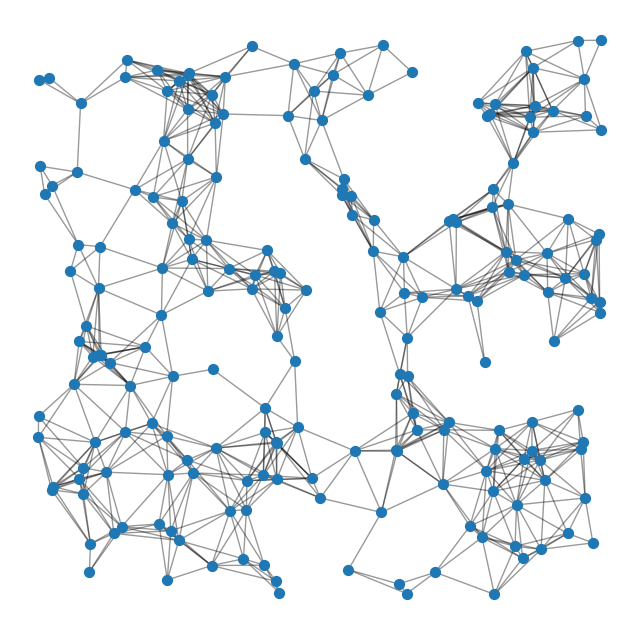

In [2]:
# Generate random geometric graph
G = nx.random_geometric_graph(200, 0.125, seed=42)

# Get node positions (stored as node attribute 'pos')
pos = nx.get_node_attributes(G, 'pos')

# Add weights
for a,b in G.edges:
    dist = np.linalg.norm(np.array(pos[a]) - np.array(pos[b]))
    G[a][b]['weight'] = dist

# Draw edges and nodes
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_size=50)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [3]:
def plot_communities(communities, pos, algo_name=''):
    plt.figure(figsize=(20, 14))

    nx.draw_networkx_edges(G, pos, alpha=0.2)

    for j, cluster in enumerate(communities):
        color = '#%06X' % randint(0, 0xFFFFFF)
        for v in cluster:
            point = pos[v]
            plt.scatter(point[0], point[1], c=color)

    plt.title(f'{algo_name} | {len(communities)} clusters')

# Filtration Clustering

Performing parallel clustering in 2 jobs
Modularity: 0.70339


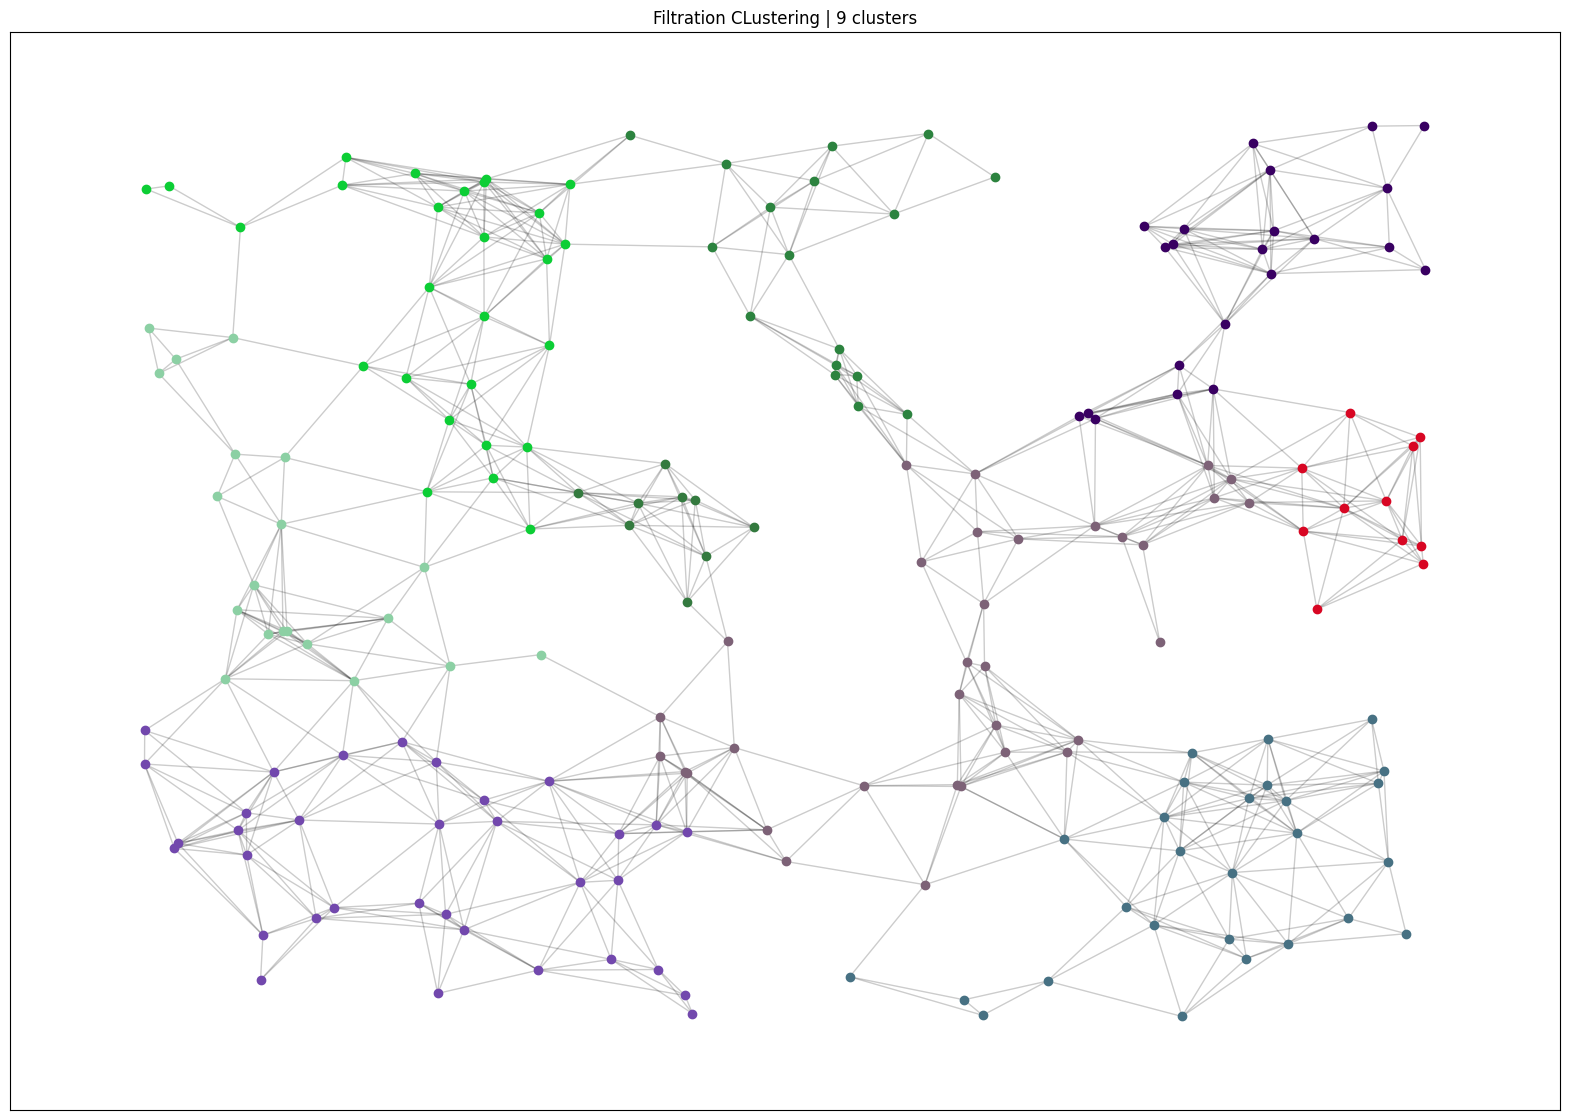

In [4]:
seed(0xAB0BA)

fc = FiltrationClustering(G, seed=42, weight='weight')
communities = fc.cluster(n_jobs=2)

print(f'Modularity: {modularity(G, communities):.5f}')

plot_communities(communities, pos, algo_name='Filtration CLustering')

# Louvain

Modularity: 0.77192


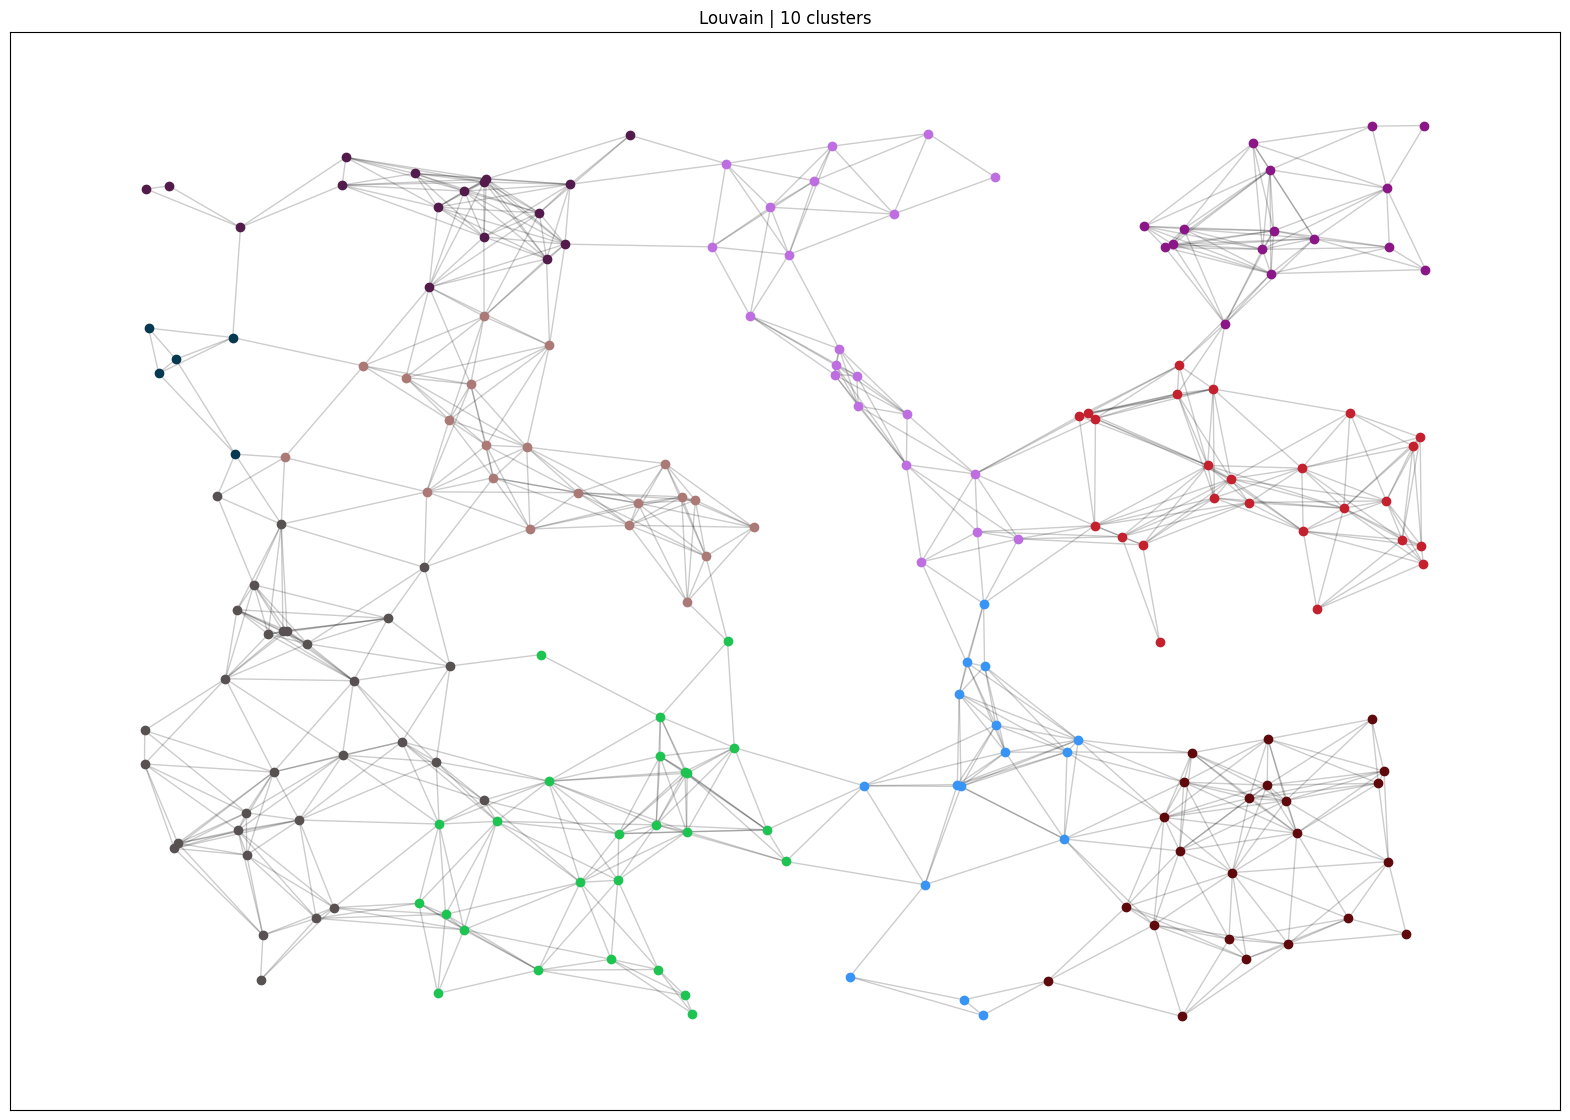

In [5]:
seed(0xAB0BA)

# Run Louvain with default parameters
louvain_partition = louvain_communities(G, seed=42, weight='weight')
print(f'Modularity: {modularity(G, louvain_partition):.5f}')

plot_communities(louvain_partition, pos, algo_name='Louvain')

# Leiden

Modularity: 0.77475


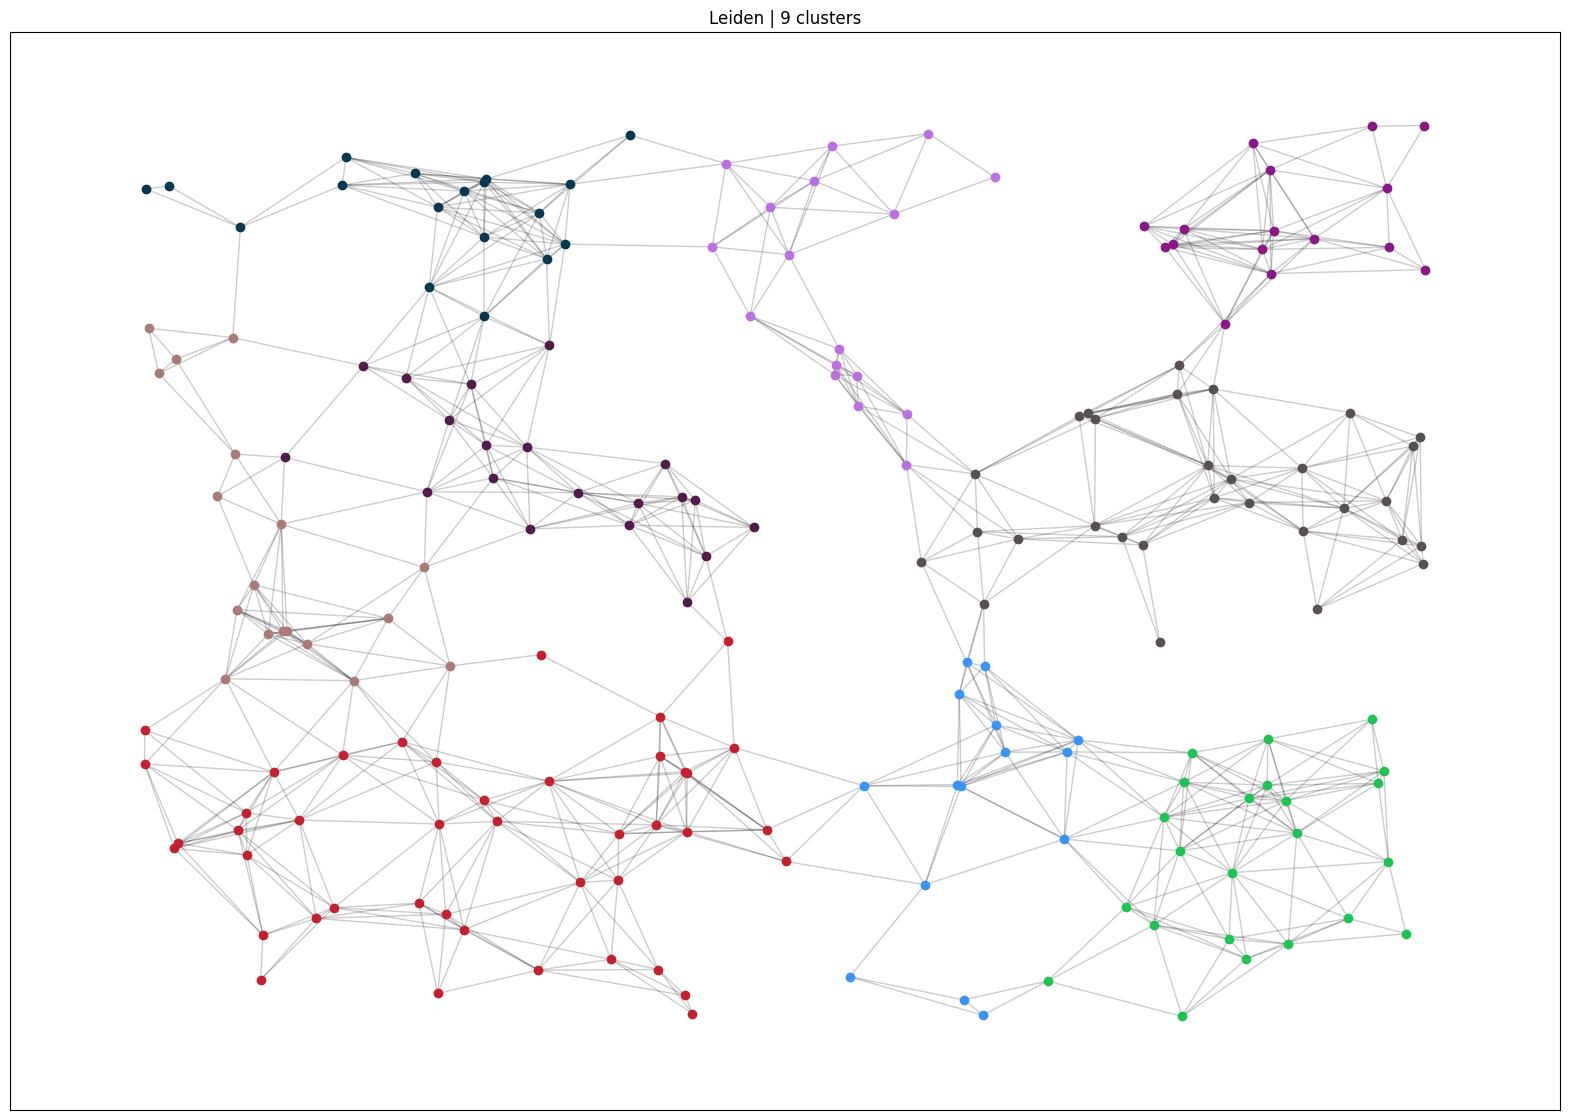

In [6]:
seed(0xAB0BA)

communities = leiden(G, partition_type=la.ModularityVertexPartition, seed=0xAB0BA, weights='weight')

print(f'Modularity: {modularity(G, communities):.5f}')

plot_communities(communities, pos, algo_name='Leiden')